In [34]:
# some matplotlib styling
from matplotlib import rc
import matplotlib.pyplot as plt
#from scipy.stats import gaussian_kde

rc('text', usetex=True)
plt.style.use('seaborn-notebook')
rc('font',**{'family':'serif','serif':['Cambria']})



plt.rcParams['image.cmap'] = 'Reds'
plt.rcParams['patch.linewidth'] = '0.5'
plt.rcParams['patch.edgecolor'] = 'black'
plt.rcParams['axes.titlesize'] = '18'
plt.rcParams['axes.labelsize'] = '18'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '12'
plt.rcParams['ytick.labelsize'] = '12'

In [35]:
import numpy as np
import pandas as pd
import math
from functools import reduce

In [36]:
illiniblue = (0/255,62/255,126/255)
illiniorange = (245/255,128/255,39/255)
kitgreen = (50/255,161/255,137/255)

## Configuration

In [37]:
alpha = 0.5
nDim = 2
sliceSize = alpha**(1.0 / (nDim - 1.0)) # 0.5 in the case of two dimensions
col1 = illiniblue # "Blue"
col2 = illiniorange # "Orange"
choice = 1
t = "circle"
n = 1000

## Generate data 

In [38]:
#data = pd.read_csv("/home/fouchee/experiment/2018-02-20-10-17_MCDE_Experiment_Batch1/2018-02-16-22-02_Power_/data/Sphere-2-0.0-1000")
data = pd.read_csv("Sphere-2-0.0")

data.columns = ["x", "y"]
data["x"] = data["x"]  + np.random.normal(size=1000,scale=0.1)
data["y"] = data["y"]  + np.random.normal(size=1000,scale=0.1)
data["x"] = (data["x"]-data["x"].min())/(data["x"].max()-data["x"].min())
data["y"] = (data["y"]-data["y"].min())/(data["y"].max()-data["y"].min())

## Choose slicing

In [39]:
if(choice):
    ref = "x"
    other = "y"
else:
    ref= "y"
    other = "x"

#yindex = np.random.randint(0, data.shape[0]-1 - data.shape[0]*sliceSize)
yindex = 220
#xindex = np.random.randint(0, data.shape[0]-1 - data.shape[0]*alpha)
xindex = 400
ry = sorted(data["y"])[yindex]
rx = sorted(data["x"])[xindex]
rye = sorted(data["y"])[int(yindex+data.shape[0]*sliceSize)]
rxe = sorted(data["x"])[int(xindex+data.shape[0]*alpha)]

#ry = np.random.uniform(high=1-sliceSize)
#rx = np.random.uniform(high=1-sliceSize)



In [40]:
inslide = ((data[other] > ry) & (data[other] < rye))
ouslide = np.logical_not(inslide) & ((data[ref] > rx) & (data[ref] < rxe))
inslide = inslide & ((data[ref] > rx) & (data[ref] < rxe))  

data['labels'] = inslide.astype(int) + ouslide.astype(int) * 2

colors = []
for x in data['labels']:
    if x == 1:
        colors.append(col1)
    elif  x == 2:
        colors.append(col2)
    else:
        colors.append((1,1,1))

## Visualize

<IPython.core.display.Javascript object>


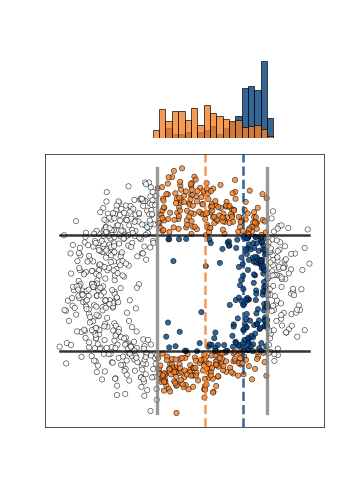

In [41]:
%matplotlib notebook
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,8))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:4])
ax_marg_x = fig.add_subplot(gs[0,0:4])
#ax_marg_y = fig.add_subplot(gs[1:4,3])

if(choice):
    ref_marg = ax_marg_x
    #other_marg = ax_marg_y
else:
    ref_marg = ax_marg_y
    other_marg = ax_marg_x
    


if(choice):
    ax_joint.plot([0,1], [ry,ry], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rye,rye], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([rx,rx], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=4)
    ax_joint.plot([rxe,rxe], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=4)
else:
    ax_joint.plot([ry,ry], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([rye,rye], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rx,rx],'k-', c="Grey", alpha=0.8, linewidth=4)
    ax_joint.plot([0,1],[rxe,rxe], 'k-', c="Grey", alpha=0.8, linewidth=4)

plt.sca(ax_joint)
plt.axvline(x=data.groupby("labels").mean()["x"][1], c=illiniblue, alpha=0.8, linewidth=3, linestyle="--")    
plt.axvline(x=data.groupby("labels").mean()["x"][2], c=illiniorange, alpha=0.8, linewidth=3, linestyle="--")        
    
ax_joint.scatter(data["x"], data["y"], color=colors, edgecolor='black', linewidth=0.7, s=40, alpha=0.8, )

nbins = 40
cond1 = data[data['labels'] == 1][ref]
#h = np.histogram(data['x'], bins=nbins, range=(0,1), weights=np.ones_like(data['x'])/len(data['x']))
h = np.histogram(cond1, bins=nbins, range=(0,1), weights=np.ones_like(cond1)/len(cond1))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
                 color=col1, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.8, height=h[1][1] - h[1][0], 
            color=col1, linewidth=1, edgecolor="black")

cond2 = data[data['labels'] == 2][ref]
h = np.histogram(cond2, bins=nbins, range=(0,1), weights=np.ones_like(cond2)/len(cond2))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
            color=col2, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.8, height=h[1][1] - h[1][0], 
            color=col2, linewidth=1, edgecolor="black")
    
ax_joint.get_xaxis().set_ticks([])
ax_joint.get_yaxis().set_ticks([])

#other_marg.remove()
ref_marg.axis('off')

#plt.tight_layout()

plt.savefig("%s_2D_0_marginal.pdf"%t, format="pdf")
#plt.savefig("/home/fouchee/slicing/%s_2D_0_marginal.png"%t, format="png")

In [42]:
inslide = ((data[other] > ry) & (data[other] < rye))
ouslide = np.logical_not(inslide) #& ((data[ref] > rx) & (data[ref] < rxe))
#inslide = inslide & ((data[ref] > rx) & (data[ref] < rxe))  

data['labels'] = inslide.astype(int) + ouslide.astype(int) * 2

colors = []
for x in data['labels']:
    if x == 1:
        colors.append(col1)
    elif  x == 2:
        colors.append(col2)
    else:
        colors.append((1,1,1))

<IPython.core.display.Javascript object>


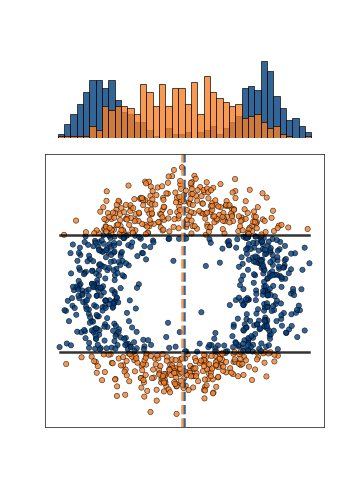

In [43]:
%matplotlib notebook
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,8))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:4])
ax_marg_x = fig.add_subplot(gs[0,0:4])
#ax_marg_y = fig.add_subplot(gs[1:4,3])

if(choice):
    ref_marg = ax_marg_x
    #other_marg = ax_marg_y
else:
    ref_marg = ax_marg_y
    other_marg = ax_marg_x
    


if(choice):
    ax_joint.plot([0,1], [ry,ry], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rye,rye], 'k-', c="Black", alpha=0.8, linewidth=3)
    #ax_joint.plot([rx,rx], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=4)
    #ax_joint.plot([rxe,rxe], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=4)
else:
    ax_joint.plot([ry,ry], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([rye,rye], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    #ax_joint.plot([0,1], [rx,rx],'k-', c="Grey", alpha=0.8, linewidth=4)
    #ax_joint.plot([0,1],[rxe,rxe], 'k-', c="Grey", alpha=0.8, linewidth=4)

plt.sca(ax_joint)
plt.axvline(x=data.groupby("labels").mean()["x"][1], c=illiniblue, alpha=0.8, linewidth=3, linestyle="--")    
plt.axvline(x=data.groupby("labels").mean()["x"][2], c=illiniorange, alpha=0.8, linewidth=3, linestyle="--")        
    
ax_joint.scatter(data["x"], data["y"], color=colors, edgecolor='black', linewidth=0.7, s=40, alpha=0.8, )

nbins = 40
cond1 = data[data['labels'] == 1][ref]
#h = np.histogram(data['x'], bins=nbins, range=(0,1), weights=np.ones_like(data['x'])/len(data['x']))
h = np.histogram(cond1, bins=nbins, range=(0,1), weights=np.ones_like(cond1)/len(cond1))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
                 color=col1, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.8, height=h[1][1] - h[1][0], 
            color=col1, linewidth=1, edgecolor="black")

cond2 = data[data['labels'] == 2][ref]
h = np.histogram(cond2, bins=nbins, range=(0,1), weights=np.ones_like(cond2)/len(cond2))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
            color=col2, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.8, height=h[1][1] - h[1][0], 
            color=col2, linewidth=1, edgecolor="black")
    
ax_joint.get_xaxis().set_ticks([])
ax_joint.get_yaxis().set_ticks([])

#other_marg.remove()
ref_marg.axis('off')

#plt.tight_layout()

plt.savefig("%s_2D_0_nomarginal.pdf"%t, format="pdf")
#plt.savefig("/home/fouchee/slicing/%s_2D_0_nomarginal.png"%t, format="png")

In [44]:
t = "linear"

In [45]:
a = np.random.uniform(size=n)
data = pd.DataFrame(data={
    "x" : a + np.random.normal(size=1000,scale=0.1),
    "y" : a + np.random.normal(size=1000,scale=0.1)
})
data["x"] = (data["x"]-data["x"].min())/(data["x"].max()-data["x"].min())
data["y"] = (data["y"]-data["y"].min())/(data["y"].max()-data["y"].min())

In [46]:
inslide = ((data[other] > ry) & (data[other] < rye))
ouslide = np.logical_not(inslide) & ((data[ref] > rx) & (data[ref] < rxe))
inslide = inslide & ((data[ref] > rx) & (data[ref] < rxe))  

data['labels'] = inslide.astype(int) + ouslide.astype(int) * 2

colors = []
for x in data['labels']:
    if x == 1:
        colors.append(col1)
    elif  x == 2:
        colors.append(col2)
    else:
        colors.append((1,1,1))

<IPython.core.display.Javascript object>


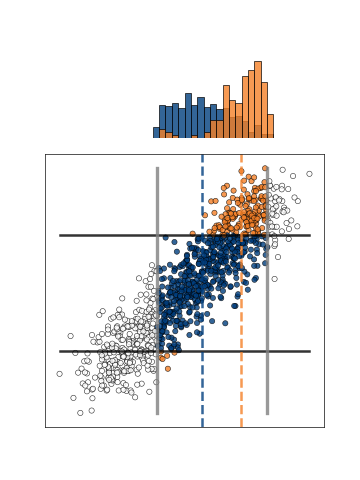

In [47]:
%matplotlib notebook
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,8))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:4])
ax_marg_x = fig.add_subplot(gs[0,0:4])
#ax_marg_y = fig.add_subplot(gs[1:4,3])

if(choice):
    ref_marg = ax_marg_x
    #other_marg = ax_marg_y
else:
    ref_marg = ax_marg_y
    other_marg = ax_marg_x
    


if(choice):
    ax_joint.plot([0,1], [ry,ry], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rye,rye], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([rx,rx], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=4)
    ax_joint.plot([rxe,rxe], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=4)
else:
    ax_joint.plot([ry,ry], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([rye,rye], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rx,rx],'k-', c="Grey", alpha=0.8, linewidth=4)
    ax_joint.plot([0,1],[rxe,rxe], 'k-', c="Grey", alpha=0.8, linewidth=4)

plt.sca(ax_joint)
plt.axvline(x=data.groupby("labels").mean()["x"][1], c=illiniblue, alpha=0.8, linewidth=3, linestyle="--")    
plt.axvline(x=data.groupby("labels").mean()["x"][2], c=illiniorange, alpha=0.8, linewidth=3, linestyle="--")        
    
ax_joint.scatter(data["x"], data["y"], color=colors, edgecolor='black', linewidth=0.7, s=40, alpha=0.8, )

nbins = 40
cond1 = data[data['labels'] == 1][ref]
#h = np.histogram(data['x'], bins=nbins, range=(0,1), weights=np.ones_like(data['x'])/len(data['x']))
h = np.histogram(cond1, bins=nbins, range=(0,1), weights=np.ones_like(cond1)/len(cond1))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
                 color=col1, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.8, height=h[1][1] - h[1][0], 
            color=col1, linewidth=1, edgecolor="black")

cond2 = data[data['labels'] == 2][ref]
h = np.histogram(cond2, bins=nbins, range=(0,1), weights=np.ones_like(cond2)/len(cond2))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
            color=col2, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.8, height=h[1][1] - h[1][0], 
            color=col2, linewidth=1, edgecolor="black")
    
ax_joint.get_xaxis().set_ticks([])
ax_joint.get_yaxis().set_ticks([])

#other_marg.remove()
ref_marg.axis('off')

#plt.tight_layout()

plt.savefig("%s_2D_0_marginal.pdf"%t, format="pdf")
#plt.savefig("/home/fouchee/slicing/%s_2D_0_marginal.png"%t, format="png")

In [48]:
inslide = ((data[other] > ry) & (data[other] < rye))
ouslide = np.logical_not(inslide) #& ((data[ref] > rx) & (data[ref] < rxe))
#inslide = inslide & ((data[ref] > rx) & (data[ref] < rxe))  

data['labels'] = inslide.astype(int) + ouslide.astype(int) * 2

colors = []
for x in data['labels']:
    if x == 1:
        colors.append(col1)
    elif  x == 2:
        colors.append(col2)
    else:
        colors.append((1,1,1))

<IPython.core.display.Javascript object>


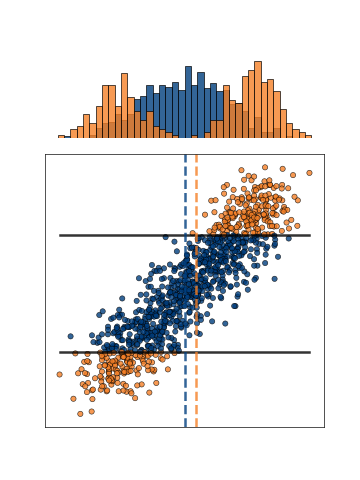

In [49]:
%matplotlib notebook
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,8))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:4])
ax_marg_x = fig.add_subplot(gs[0,0:4])
#ax_marg_y = fig.add_subplot(gs[1:4,3])

if(choice):
    ref_marg = ax_marg_x
    #other_marg = ax_marg_y
else:
    ref_marg = ax_marg_y
    other_marg = ax_marg_x
    


if(choice):
    ax_joint.plot([0,1], [ry,ry], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rye,rye], 'k-', c="Black", alpha=0.8, linewidth=3)
    #ax_joint.plot([rx,rx], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=4)
    #ax_joint.plot([rxe,rxe], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=4)
else:
    ax_joint.plot([ry,ry], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([rye,rye], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    #ax_joint.plot([0,1], [rx,rx],'k-', c="Grey", alpha=0.8, linewidth=4)
    #ax_joint.plot([0,1],[rxe,rxe], 'k-', c="Grey", alpha=0.8, linewidth=4)

plt.sca(ax_joint)
plt.axvline(x=data.groupby("labels").mean()["x"][1], c=illiniblue, alpha=0.8, linewidth=3, linestyle="--")    
plt.axvline(x=data.groupby("labels").mean()["x"][2], c=illiniorange, alpha=0.8, linewidth=3, linestyle="--")        
    
ax_joint.scatter(data["x"], data["y"], color=colors, edgecolor='black', linewidth=0.7, s=40, alpha=0.8, )

nbins = 40
cond1 = data[data['labels'] == 1][ref]
#h = np.histogram(data['x'], bins=nbins, range=(0,1), weights=np.ones_like(data['x'])/len(data['x']))
h = np.histogram(cond1, bins=nbins, range=(0,1), weights=np.ones_like(cond1)/len(cond1))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
                 color=col1, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.8, height=h[1][1] - h[1][0], 
            color=col1, linewidth=1, edgecolor="black")

cond2 = data[data['labels'] == 2][ref]
h = np.histogram(cond2, bins=nbins, range=(0,1), weights=np.ones_like(cond2)/len(cond2))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
            color=col2, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.8, height=h[1][1] - h[1][0], 
            color=col2, linewidth=1, edgecolor="black")
    
ax_joint.get_xaxis().set_ticks([])
ax_joint.get_yaxis().set_ticks([])

#other_marg.remove()
ref_marg.axis('off')

#plt.tight_layout()

plt.savefig("%s_2D_0_nomarginal.pdf"%t, format="pdf")
#plt.savefig("/home/fouchee/slicing/%s_2D_0_nomarginal.png"%t, format="png")

In [50]:
t = "independent"

In [51]:
data = pd.DataFrame(data={
        "x" : np.random.uniform(size=n),
        "y" : np.random.uniform(size=n)
    })

In [52]:
inslide = ((data[other] > ry) & (data[other] < rye))
ouslide = np.logical_not(inslide) & ((data[ref] > rx) & (data[ref] < rxe))
inslide = inslide & ((data[ref] > rx) & (data[ref] < rxe))  

data['labels'] = inslide.astype(int) + ouslide.astype(int) * 2

colors = []
for x in data['labels']:
    if x == 1:
        colors.append(col1)
    elif  x == 2:
        colors.append(col2)
    else:
        colors.append((1,1,1))

<IPython.core.display.Javascript object>


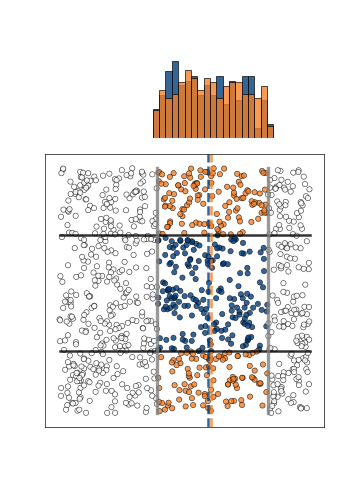

In [53]:
%matplotlib notebook
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,8))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:4])
ax_marg_x = fig.add_subplot(gs[0,0:4])
#ax_marg_y = fig.add_subplot(gs[1:4,3])

if(choice):
    ref_marg = ax_marg_x
    #other_marg = ax_marg_y
else:
    ref_marg = ax_marg_y
    other_marg = ax_marg_x
    


if(choice):
    ax_joint.plot([0,1], [ry,ry], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rye,rye], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([rx,rx], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=4)
    ax_joint.plot([rxe,rxe], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=4)
else:
    ax_joint.plot([ry,ry], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([rye,rye], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rx,rx],'k-', c="Grey", alpha=0.8, linewidth=4)
    ax_joint.plot([0,1],[rxe,rxe], 'k-', c="Grey", alpha=0.8, linewidth=4)

plt.sca(ax_joint)
plt.axvline(x=data.groupby("labels").mean()["x"][1], c=illiniblue, alpha=0.8, linewidth=3, linestyle="--")    
plt.axvline(x=data.groupby("labels").mean()["x"][2], c=illiniorange, alpha=0.8, linewidth=3, linestyle="--")        
    
ax_joint.scatter(data["x"], data["y"], color=colors, edgecolor='black', linewidth=0.7, s=40, alpha=0.8, )

nbins = 40
cond1 = data[data['labels'] == 1][ref]
#h = np.histogram(data['x'], bins=nbins, range=(0,1), weights=np.ones_like(data['x'])/len(data['x']))
h = np.histogram(cond1, bins=nbins, range=(0,1), weights=np.ones_like(cond1)/len(cond1))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
                 color=col1, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.8, height=h[1][1] - h[1][0], 
            color=col1, linewidth=1, edgecolor="black")

cond2 = data[data['labels'] == 2][ref]
h = np.histogram(cond2, bins=nbins, range=(0,1), weights=np.ones_like(cond2)/len(cond2))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
            color=col2, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.8, height=h[1][1] - h[1][0], 
            color=col2, linewidth=1, edgecolor="black")
    
ax_joint.get_xaxis().set_ticks([])
ax_joint.get_yaxis().set_ticks([])

#other_marg.remove()
ref_marg.axis('off')

#plt.tight_layout()

plt.savefig("%s_2D_0_marginal.pdf"%t, format="pdf")
#plt.savefig("/home/fouchee/slicing/%s_2D_0_marginal.png"%t, format="png")

In [54]:
inslide = ((data[other] > ry) & (data[other] < rye))
ouslide = np.logical_not(inslide) #& ((data[ref] > rx) & (data[ref] < rxe))
#inslide = inslide & ((data[ref] > rx) & (data[ref] < rxe))  

data['labels'] = inslide.astype(int) + ouslide.astype(int) * 2

colors = []
for x in data['labels']:
    if x == 1:
        colors.append(col1)
    elif  x == 2:
        colors.append(col2)
    else:
        colors.append((1,1,1))

<IPython.core.display.Javascript object>


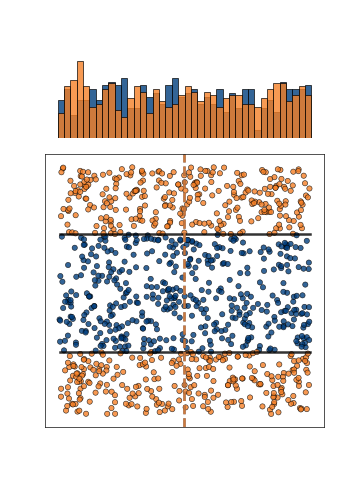

In [55]:
%matplotlib notebook
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,8))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:4])
ax_marg_x = fig.add_subplot(gs[0,0:4])
#ax_marg_y = fig.add_subplot(gs[1:4,3])

if(choice):
    ref_marg = ax_marg_x
    #other_marg = ax_marg_y
else:
    ref_marg = ax_marg_y
    other_marg = ax_marg_x
    


if(choice):
    ax_joint.plot([0,1], [ry,ry], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rye,rye], 'k-', c="Black", alpha=0.8, linewidth=3)
    #ax_joint.plot([rx,rx], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=4)
    #ax_joint.plot([rxe,rxe], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=4)
else:
    ax_joint.plot([ry,ry], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([rye,rye], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    #ax_joint.plot([0,1], [rx,rx],'k-', c="Grey", alpha=0.8, linewidth=4)
    #ax_joint.plot([0,1],[rxe,rxe], 'k-', c="Grey", alpha=0.8, linewidth=4)

plt.sca(ax_joint)
plt.axvline(x=data.groupby("labels").mean()["x"][1], c=illiniblue, alpha=0.8, linewidth=3, linestyle="--")    
plt.axvline(x=data.groupby("labels").mean()["x"][2], c=illiniorange, alpha=0.8, linewidth=3, linestyle="--")        
    
ax_joint.scatter(data["x"], data["y"], color=colors, edgecolor='black', linewidth=0.7, s=40, alpha=0.8, )

nbins = 40
cond1 = data[data['labels'] == 1][ref]
#h = np.histogram(data['x'], bins=nbins, range=(0,1), weights=np.ones_like(data['x'])/len(data['x']))
h = np.histogram(cond1, bins=nbins, range=(0,1), weights=np.ones_like(cond1)/len(cond1))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
                 color=col1, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.8, height=h[1][1] - h[1][0], 
            color=col1, linewidth=1, edgecolor="black")

cond2 = data[data['labels'] == 2][ref]
h = np.histogram(cond2, bins=nbins, range=(0,1), weights=np.ones_like(cond2)/len(cond2))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
            color=col2, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.8, height=h[1][1] - h[1][0], 
            color=col2, linewidth=1, edgecolor="black")
    
ax_joint.get_xaxis().set_ticks([])
ax_joint.get_yaxis().set_ticks([])

#other_marg.remove()
ref_marg.axis('off')

#plt.tight_layout()

plt.savefig("%s_2D_0_nomarginal.pdf"%t, format="pdf")
#plt.savefig("/home/fouchee/slicing/%s_2D_0_nomarginal.png"%t, format="png")

In [56]:
t="cross"
data = pd.read_csv("Cross-2-0.0")
data.columns = ["x", "y"]
data["x"] = data["x"]  + np.random.normal(size=1000,scale=0.1)
data["y"] = data["y"]  + np.random.normal(size=1000,scale=0.1)
data["x"] = (data["x"]-data["x"].min())/(data["x"].max()-data["x"].min())
data["y"] = (data["y"]-data["y"].min())/(data["y"].max()-data["y"].min())

In [57]:
inslide = ((data[other] > ry) & (data[other] < rye))
ouslide = np.logical_not(inslide) & ((data[ref] > rx) & (data[ref] < rxe))
inslide = inslide & ((data[ref] > rx) & (data[ref] < rxe))  

data['labels'] = inslide.astype(int) + ouslide.astype(int) * 2

colors = []
for x in data['labels']:
    if x == 1:
        colors.append(col1)
    elif  x == 2:
        colors.append(col2)
    else:
        colors.append((1,1,1))

<IPython.core.display.Javascript object>


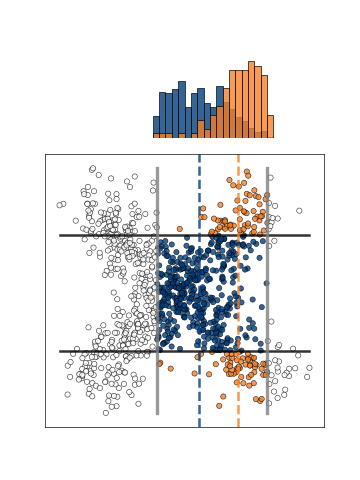

In [58]:
%matplotlib notebook
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,8))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:4])
ax_marg_x = fig.add_subplot(gs[0,0:4])
#ax_marg_y = fig.add_subplot(gs[1:4,3])

if(choice):
    ref_marg = ax_marg_x
    #other_marg = ax_marg_y
else:
    ref_marg = ax_marg_y
    other_marg = ax_marg_x
    


if(choice):
    ax_joint.plot([0,1], [ry,ry], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rye,rye], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([rx,rx], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=4)
    ax_joint.plot([rxe,rxe], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=4)
else:
    ax_joint.plot([ry,ry], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([rye,rye], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rx,rx],'k-', c="Grey", alpha=0.8, linewidth=4)
    ax_joint.plot([0,1],[rxe,rxe], 'k-', c="Grey", alpha=0.8, linewidth=4)

plt.sca(ax_joint)
plt.axvline(x=data.groupby("labels").mean()["x"][1], c=illiniblue, alpha=0.8, linewidth=3, linestyle="--")    
plt.axvline(x=data.groupby("labels").mean()["x"][2], c=illiniorange, alpha=0.8, linewidth=3, linestyle="--")        
    
ax_joint.scatter(data["x"], data["y"], color=colors, edgecolor='black', linewidth=0.7, s=40, alpha=0.8, )

nbins = 40
cond1 = data[data['labels'] == 1][ref]
#h = np.histogram(data['x'], bins=nbins, range=(0,1), weights=np.ones_like(data['x'])/len(data['x']))
h = np.histogram(cond1, bins=nbins, range=(0,1), weights=np.ones_like(cond1)/len(cond1))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
                 color=col1, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.8, height=h[1][1] - h[1][0], 
            color=col1, linewidth=1, edgecolor="black")

cond2 = data[data['labels'] == 2][ref]
h = np.histogram(cond2, bins=nbins, range=(0,1), weights=np.ones_like(cond2)/len(cond2))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
            color=col2, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.8, height=h[1][1] - h[1][0], 
            color=col2, linewidth=1, edgecolor="black")
    
ax_joint.get_xaxis().set_ticks([])
ax_joint.get_yaxis().set_ticks([])

#other_marg.remove()
ref_marg.axis('off')

#plt.tight_layout()

plt.savefig("%s_2D_0_marginal.pdf"%t, format="pdf")
#plt.savefig("/home/fouchee/slicing/%s_2D_0_marginal.png"%t, format="png")

In [59]:
inslide = ((data[other] > ry) & (data[other] < rye))
ouslide = np.logical_not(inslide) #& ((data[ref] > rx) & (data[ref] < rxe))
#inslide = inslide & ((data[ref] > rx) & (data[ref] < rxe))  

data['labels'] = inslide.astype(int) + ouslide.astype(int) * 2

colors = []
for x in data['labels']:
    if x == 1:
        colors.append(col1)
    elif  x == 2:
        colors.append(col2)
    else:
        colors.append((1,1,1))

<IPython.core.display.Javascript object>


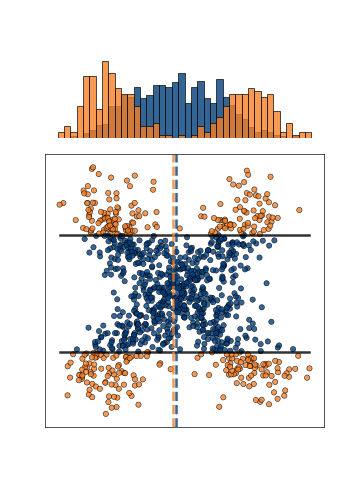

In [60]:
%matplotlib notebook
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,8))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:4])
ax_marg_x = fig.add_subplot(gs[0,0:4])
#ax_marg_y = fig.add_subplot(gs[1:4,3])

if(choice):
    ref_marg = ax_marg_x
    #other_marg = ax_marg_y
else:
    ref_marg = ax_marg_y
    other_marg = ax_marg_x
    


if(choice):
    ax_joint.plot([0,1], [ry,ry], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rye,rye], 'k-', c="Black", alpha=0.8, linewidth=3)
    #ax_joint.plot([rx,rx], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=4)
    #ax_joint.plot([rxe,rxe], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=4)
else:
    ax_joint.plot([ry,ry], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([rye,rye], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    #ax_joint.plot([0,1], [rx,rx],'k-', c="Grey", alpha=0.8, linewidth=4)
    #ax_joint.plot([0,1],[rxe,rxe], 'k-', c="Grey", alpha=0.8, linewidth=4)

plt.sca(ax_joint)
plt.axvline(x=data.groupby("labels").mean()["x"][1], c=illiniblue, alpha=0.8, linewidth=3, linestyle="--")    
plt.axvline(x=data.groupby("labels").mean()["x"][2], c=illiniorange, alpha=0.8, linewidth=3, linestyle="--")        
    
ax_joint.scatter(data["x"], data["y"], color=colors, edgecolor='black', linewidth=0.7, s=40, alpha=0.8, )

nbins = 40
cond1 = data[data['labels'] == 1][ref]
#h = np.histogram(data['x'], bins=nbins, range=(0,1), weights=np.ones_like(data['x'])/len(data['x']))
h = np.histogram(cond1, bins=nbins, range=(0,1), weights=np.ones_like(cond1)/len(cond1))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
                 color=col1, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.8, height=h[1][1] - h[1][0], 
            color=col1, linewidth=1, edgecolor="black")

cond2 = data[data['labels'] == 2][ref]
h = np.histogram(cond2, bins=nbins, range=(0,1), weights=np.ones_like(cond2)/len(cond2))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.8, width=h[1][1] - h[1][0], bottom=1.1, 
            color=col2, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.8, height=h[1][1] - h[1][0], 
            color=col2, linewidth=1, edgecolor="black")
    
ax_joint.get_xaxis().set_ticks([])
ax_joint.get_yaxis().set_ticks([])

#other_marg.remove()
ref_marg.axis('off')

#plt.tight_layout()

plt.savefig("%s_2D_0_nomarginal.pdf"%t, format="pdf")
#plt.savefig("/home/fouchee/slicing/%s_2D_0_nomarginal.png"%t, format="png")

In [15]:
number = 3

## Draw supplementary examples (on same data)

In [16]:
number += 1

choice = np.random.randint(0,2)

if(choice):
    ref = "x"
    other = "y"
    ref_marg = ax_marg_x
    other_marg = ax_marg_y
else:
    ref= "y"
    other = "x"
    ref_marg = ax_marg_y
    other_marg = ax_marg_x

    
yindex = np.random.randint(0, data.shape[0]-1 - data.shape[0]*sliceSize)
xindex = np.random.randint(0, data.shape[0]-1 - data.shape[0]*alpha)
ry = sorted(data["y"])[yindex]
rx = sorted(data["x"])[xindex]
rye = sorted(data["y"])[int(yindex+data.shape[0]*sliceSize)]
rxe = sorted(data["x"])[int(xindex+data.shape[0]*alpha)]

#ry = np.random.uniform(high=1-sliceSize)
#rx = np.random.uniform(high=1-sliceSize)

inslide = ((data[other] > ry) & (data[other] < rye))
ouslide = np.logical_not(inslide) & ((data[ref] > rx) & (data[ref] < rxe))
inslide = inslide & ((data[ref] > rx) & (data[ref] < rxe))  

data['labels'] = inslide.astype(int) + ouslide.astype(int) * 2

colors = []
for x in data['labels']:
    if x == 1:
        colors.append(col1)
    elif  x == 2:
        colors.append(col2)
    else:
        colors.append('w')


<IPython.core.display.Javascript object>


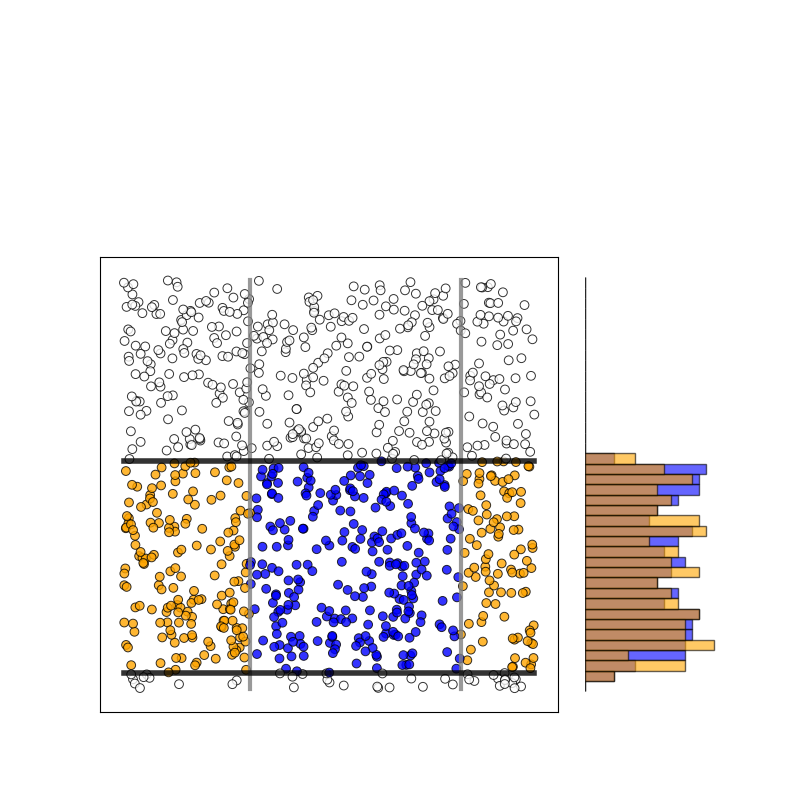

In [17]:
%matplotlib notebook
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8,8))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

if(choice):
    ref = "x"
    other = "y"
    ref_marg = ax_marg_x
    other_marg = ax_marg_y
else:
    ref= "y"
    other = "x"
    ref_marg = ax_marg_y
    other_marg = ax_marg_x

if(choice):
    ax_joint.plot([0,1], [ry,ry], 'k-', c="Grey", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rye,rye], 'k-', c="Grey", alpha=0.8, linewidth=3)
    ax_joint.plot([rx,rx], [0,1], 'k-', c="Black", alpha=0.8, linewidth=4)
    ax_joint.plot([rxe,rxe], [0,1], 'k-', c="Black", alpha=0.8, linewidth=4)
else:
    ax_joint.plot([ry,ry], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=3)
    ax_joint.plot([rye,rye], [0,1], 'k-', c="Grey", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rx,rx],'k-', c="Black", alpha=0.8, linewidth=4)
    ax_joint.plot([0,1],[rxe,rxe], 'k-', c="Black", alpha=0.8, linewidth=4)


ax_joint.scatter(data["x"], data["y"], color=colors, edgecolor='black', linewidth=0.7, s=40, alpha=0.8, )

nbins = 40
cond1 = data[data['labels'] == 1][ref]
#h = np.histogram(data['x'], bins=nbins, range=(0,1), weights=np.ones_like(data['x'])/len(data['x']))
h = np.histogram(cond1, bins=nbins, range=(0,1), weights=np.ones_like(cond1)/len(cond1))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.6, width=h[1][1] - h[1][0], bottom=1.1, 
                 color=col1, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.6, height=h[1][1] - h[1][0], 
            color=col1, linewidth=1, edgecolor="black")

cond2 = data[data['labels'] == 2][ref]
h = np.histogram(cond2, bins=nbins, range=(0,1), weights=np.ones_like(cond2)/len(cond2))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.6, width=h[1][1] - h[1][0], bottom=1.1, 
            color=col2, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.6, height=h[1][1] - h[1][0], 
            color=col2, linewidth=1, edgecolor="black")
    
ax_joint.get_xaxis().set_ticks([])
ax_joint.get_yaxis().set_ticks([])

other_marg.remove()
ref_marg.axis('off')

#plt.tight_layout()

plt.savefig("/home/fouchee/slicing/%s_2D_0_%s.pdf"%(t, number), format="pdf")
plt.savefig("/home/fouchee/slicing/%s_2D_0_%s.png"%(t, number), format="png")

In [156]:
number

10

In [182]:
choice

0

In [186]:
np.random.randint(0,2)

1

In [6]:
choice

1

<IPython.core.display.Javascript object>


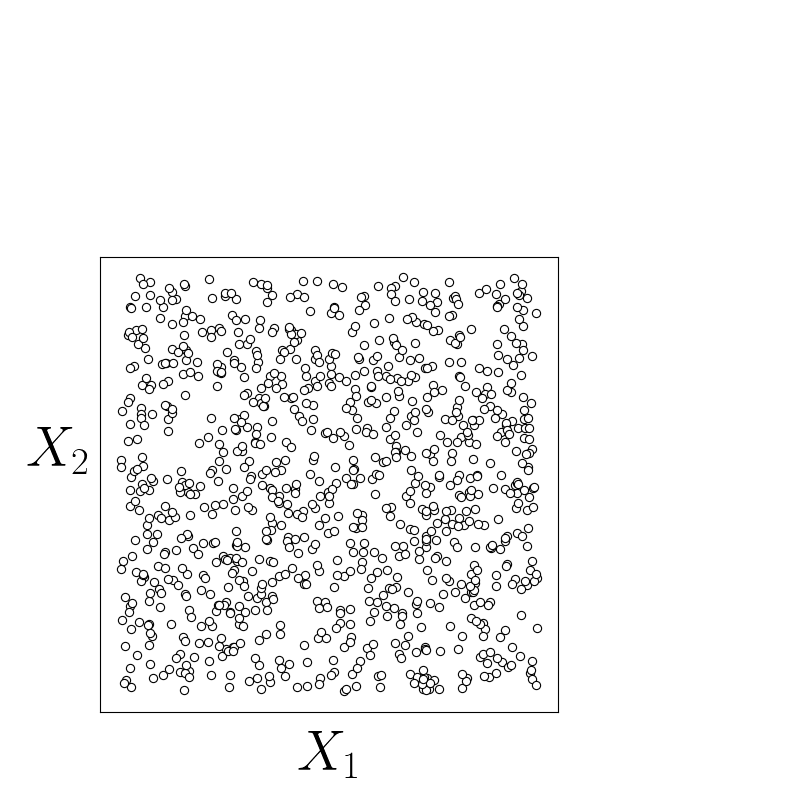

In [14]:
%matplotlib notebook
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8,8))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

if(choice):
    ref_marg = ax_marg_x
    other_marg = ax_marg_y
else:
    ref_marg = ax_marg_y
    other_marg = ax_marg_x

colors = []
for x in data['labels']:
    if x == 1:
        colors.append(col1)
    elif  x == 2:
        colors.append(col2)
    else:
        colors.append('w')

ax_joint.scatter(data["x"], data["y"], color="w", edgecolor='black', linewidth=0.8, s=35)

ax_joint.get_xaxis().set_ticks([])
ax_joint.get_yaxis().set_ticks([])

other_marg.remove()
ref_marg.axis('off')


ax_joint.set_xlabel("$X_1$", fontsize=40, labelpad=20)
ax_joint.set_ylabel("$X_2$", fontsize=40, rotation=0, labelpad=30)
ax_joint.set_xlim((-0.05,1.05))
ax_joint.set_ylim((-0.05,1.05))

#plt.tight_layout()

plt.savefig("/home/fouchee/slicing/s_%s_2D_0_0.pdf"%t, format="pdf")
plt.savefig("/home/fouchee/slicing/s_%s_2D_0_0.png"%t, format="png")

<IPython.core.display.Javascript object>


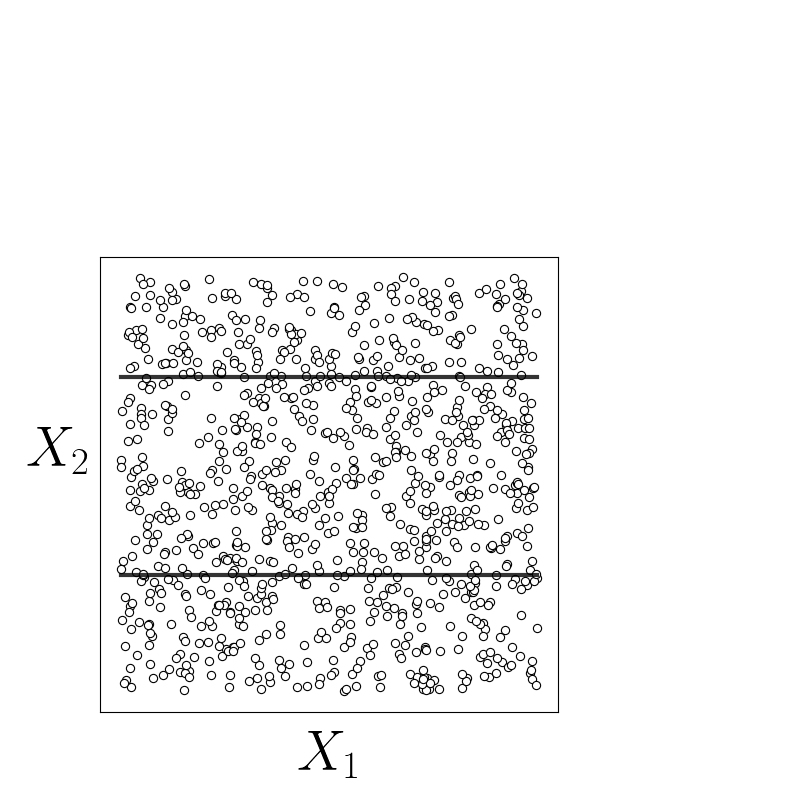

In [15]:
%matplotlib notebook
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8,8))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

if(choice):
    ref_marg = ax_marg_x
    other_marg = ax_marg_y
else:
    ref_marg = ax_marg_y
    other_marg = ax_marg_x

if(choice):
    ax_joint.plot([0,1], [ry,ry], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rye,rye], 'k-', c="Black", alpha=0.8, linewidth=3)
else:
    ax_joint.plot([ry,ry], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([rye,rye], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)


ax_joint.scatter(data["x"], data["y"], color="w", edgecolor='black', linewidth=0.8, s=35)

ax_joint.get_xaxis().set_ticks([])
ax_joint.get_yaxis().set_ticks([])

other_marg.remove()
ref_marg.axis('off')

ax_joint.set_xlabel("$X_1$", fontsize=40, labelpad=20)
ax_joint.set_ylabel("$X_2$", fontsize=40, rotation=0, labelpad=30)
ax_joint.set_xlim((-0.05,1.05))
ax_joint.set_ylim((-0.05,1.05))

#plt.tight_layout()

plt.savefig("/home/fouchee/slicing/s_%s_2D_0_1.pdf"%t, format="pdf")
plt.savefig("/home/fouchee/slicing/s_%s_2D_0_1.png"%t, format="png")

<IPython.core.display.Javascript object>


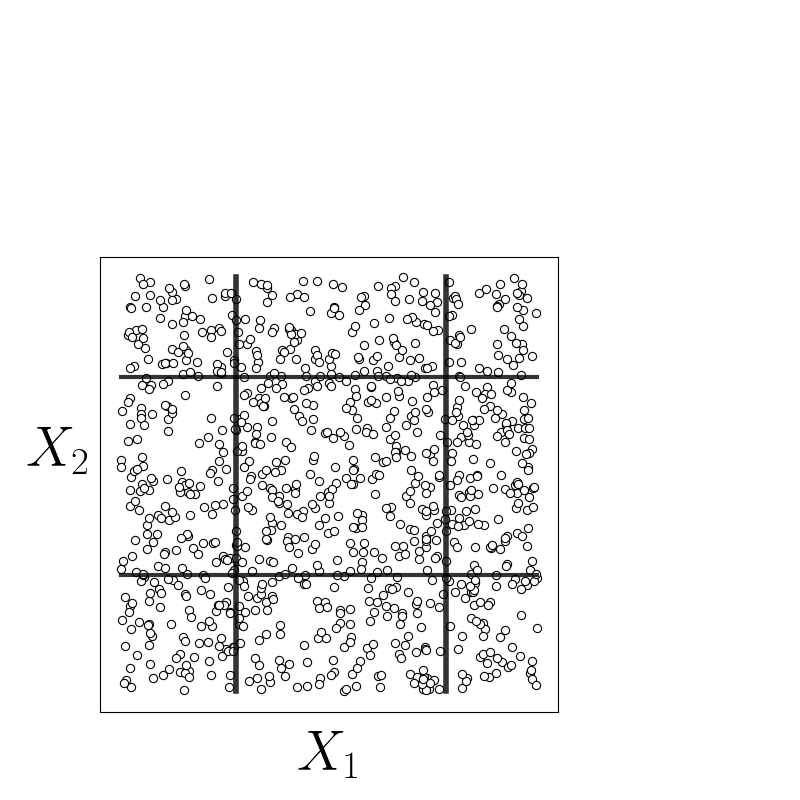

In [16]:
%matplotlib notebook
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8,8))

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

if(choice):
    ref_marg = ax_marg_x
    other_marg = ax_marg_y
else:
    ref_marg = ax_marg_y
    other_marg = ax_marg_x

if(choice):
    ax_joint.plot([0,1], [ry,ry], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rye,rye], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([rx,rx], [0,1], 'k-', c="Black", alpha=0.8, linewidth=4)
    ax_joint.plot([rxe,rxe], [0,1], 'k-', c="Black", alpha=0.8, linewidth=4)
else:
    ax_joint.plot([ry,ry], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([rye,rye], [0,1], 'k-', c="Black", alpha=0.8, linewidth=4)
    ax_joint.plot([0,1], [rx,rx],'k-', c="Black", alpha=0.8, linewidth=4)
    ax_joint.plot([0,1],[rxe,rxe], 'k-', c="Black", alpha=0.8, linewidth=4)


ax_joint.scatter(data["x"], data["y"], color="w", edgecolor='black', linewidth=0.8, s=35)

ax_joint.get_xaxis().set_ticks([])
ax_joint.get_yaxis().set_ticks([])

other_marg.remove()
ref_marg.axis('off')

ax_joint.set_xlabel("$X_1$", fontsize=40, labelpad=20)
ax_joint.set_ylabel("$X_2$", fontsize=40, rotation=0, labelpad=30)
ax_joint.set_xlim((-0.05,1.05))
ax_joint.set_ylim((-0.05,1.05))

#plt.tight_layout()

plt.savefig("/home/fouchee/slicing/s_%s_2D_0_2.pdf"%t, format="pdf")
plt.savefig("/home/fouchee/slicing/s_%s_2D_0_2.png"%t, format="png")

<IPython.core.display.Javascript object>


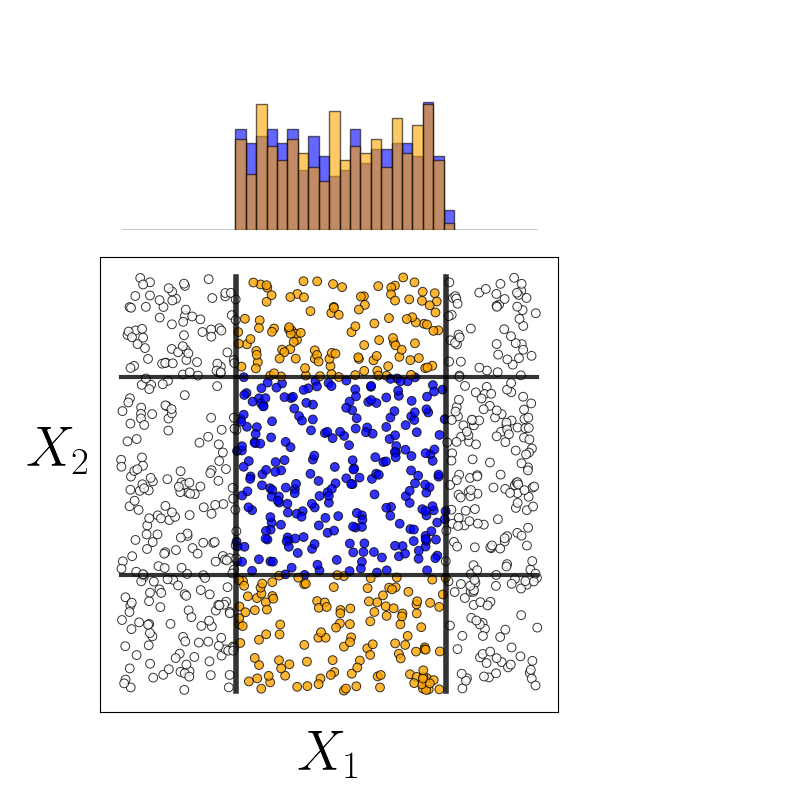

In [17]:
%matplotlib notebook
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8,8))

gs = GridSpec(4,4)

colors = []
for x in data['labels']:
    if x == 1:
        colors.append(col1)
    elif  x == 2:
        colors.append(col2)
    else:
        colors.append('w')

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

if(choice):
    ref_marg = ax_marg_x
    other_marg = ax_marg_y
else:
    ref_marg = ax_marg_y
    other_marg = ax_marg_x

if(choice):
    ax_joint.plot([0,1], [ry,ry], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rye,rye], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([rx,rx], [0,1], 'k-', c="Black", alpha=0.8, linewidth=4)
    ax_joint.plot([rxe,rxe], [0,1], 'k-', c="Black", alpha=0.8, linewidth=4)
else:
    ax_joint.plot([ry,ry], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([rye,rye], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
    ax_joint.plot([0,1], [rx,rx],'k-', c="Black", alpha=0.8, linewidth=4)
    ax_joint.plot([0,1],[rxe,rxe], 'k-', c="Black", alpha=0.8, linewidth=4)


ax_joint.scatter(data["x"], data["y"], color=colors, edgecolor='black', linewidth=0.7, s=40, alpha=0.8, )

nbins = 40
cond1 = data[data['labels'] == 1][ref]
#h = np.histogram(data['x'], bins=nbins, range=(0,1), weights=np.ones_like(data['x'])/len(data['x']))
h = np.histogram(cond1, bins=nbins, range=(0,1), weights=np.ones_like(cond1)/len(cond1))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.6, width=h[1][1] - h[1][0], bottom=1.1, 
                 color=col1, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.6, height=h[1][1] - h[1][0], 
            color=col1, linewidth=1, edgecolor="black")

cond2 = data[data['labels'] == 2][ref]
h = np.histogram(cond2, bins=nbins, range=(0,1), weights=np.ones_like(cond2)/len(cond2))

if(choice):
    ref_marg.bar(h[1][:-1], h[0], alpha=0.6, width=h[1][1] - h[1][0], bottom=1.1, 
            color=col2, linewidth=1, edgecolor="black")
else:
    ref_marg.barh(h[1][:-1], h[0], alpha=0.6, height=h[1][1] - h[1][0], 
            color=col2, linewidth=1, edgecolor="black")
    
ax_joint.get_xaxis().set_ticks([])
ax_joint.get_yaxis().set_ticks([])

other_marg.remove()
ref_marg.axis('off')

ax_joint.set_xlabel("$X_1$", fontsize=40, labelpad=20)
ax_joint.set_ylabel("$X_2$", fontsize=40, rotation=0, labelpad=30)
ax_joint.set_xlim((-0.05,1.05))
ax_joint.set_ylim((-0.05,1.05))

#plt.tight_layout()

plt.savefig("/home/fouchee/slicing/s_%s_2D_0_3.pdf"%t, format="pdf")
plt.savefig("/home/fouchee/slicing/s_%s_2D_0_3.png"%t, format="png")

# For the comparison

In [190]:
data = pd.DataFrame(data={
        "x" : np.random.uniform(size=n),
        "y" : np.random.uniform(size=n)
    })
independent = data

a = np.random.uniform(size=n)
data = pd.DataFrame(data={
    "x" : a + np.random.normal(size=1000,scale=0.1),
    "y" : a + np.random.normal(size=1000,scale=0.1)
})
data["x"] = (data["x"]-data["x"].min())/(data["x"].max()-data["x"].min())
data["y"] = (data["y"]-data["y"].min())/(data["y"].max()-data["y"].min())
linear = data 


data = pd.read_csv("/home/fouchee/experiment/2018-02-20-10-17_MCDE_Experiment_Batch1/2018-02-16-22-02_Power_/data/Cross-2-0.0-1000")
data.columns = ["x", "y"]
data["x"] = data["x"]  + np.random.normal(size=1000,scale=0.1)
data["y"] = data["y"]  + np.random.normal(size=1000,scale=0.1)
data["x"] = (data["x"]-data["x"].min())/(data["x"].max()-data["x"].min())
data["y"] = (data["y"]-data["y"].min())/(data["y"].max()-data["y"].min())
cross = data 

data = pd.read_csv("/home/fouchee/experiment/2018-02-20-10-17_MCDE_Experiment_Batch1/2018-02-16-22-02_Power_/data/Sphere-2-0.0-1000")
data.columns = ["x", "y"]
data["x"] = data["x"]  + np.random.normal(size=1000,scale=0.1)
data["y"] = data["y"]  + np.random.normal(size=1000,scale=0.1)
data["x"] = (data["x"]-data["x"].min())/(data["x"].max()-data["x"].min())
data["y"] = (data["y"]-data["y"].min())/(data["y"].max()-data["y"].min())
circle = data 

In [204]:
for data in [independent, linear, cross, circle]:
    inslide = ((data[other] > ry) & (data[other] < rye))
    ouslide = np.logical_not(inslide) & ((data[ref] > rx) & (data[ref] < rxe))
    inslide = inslide & ((data[ref] > rx) & (data[ref] < rxe))  
    data['labels'] = inslide.astype(int) + ouslide.astype(int) * 2

<IPython.core.display.Javascript object>


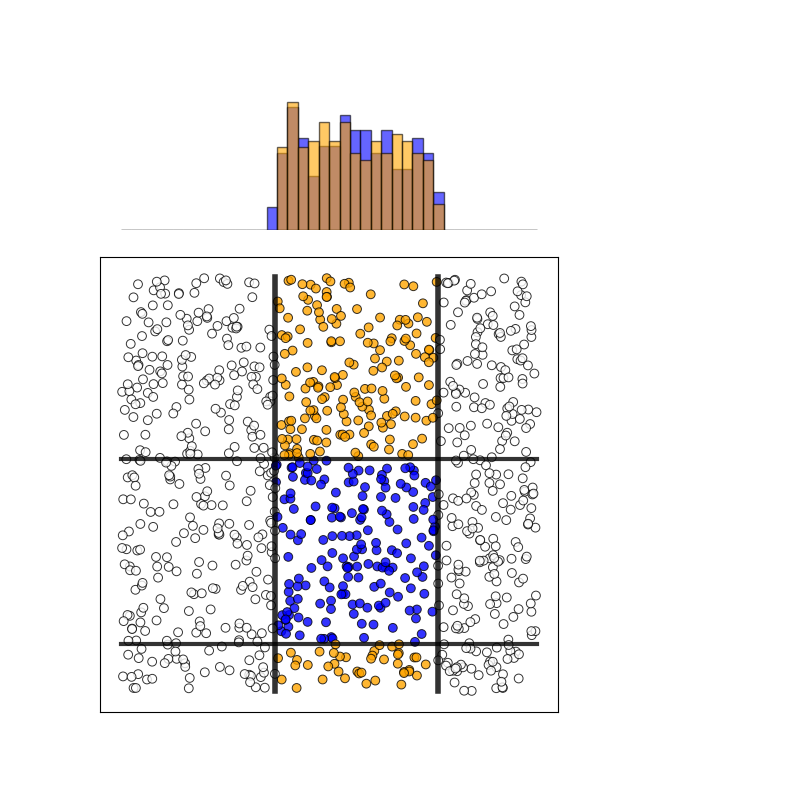

<IPython.core.display.Javascript object>


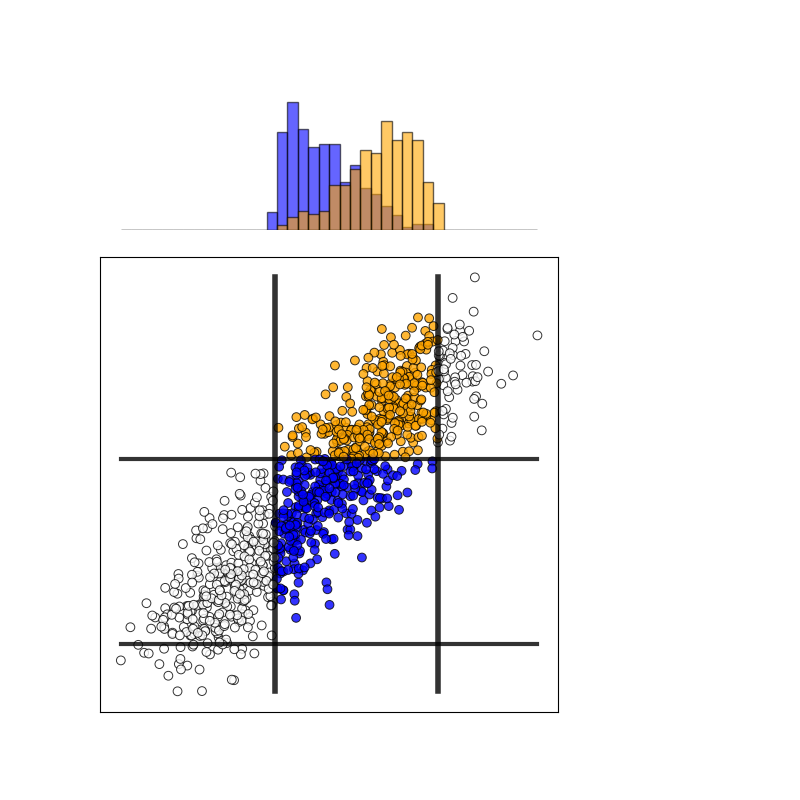

<IPython.core.display.Javascript object>


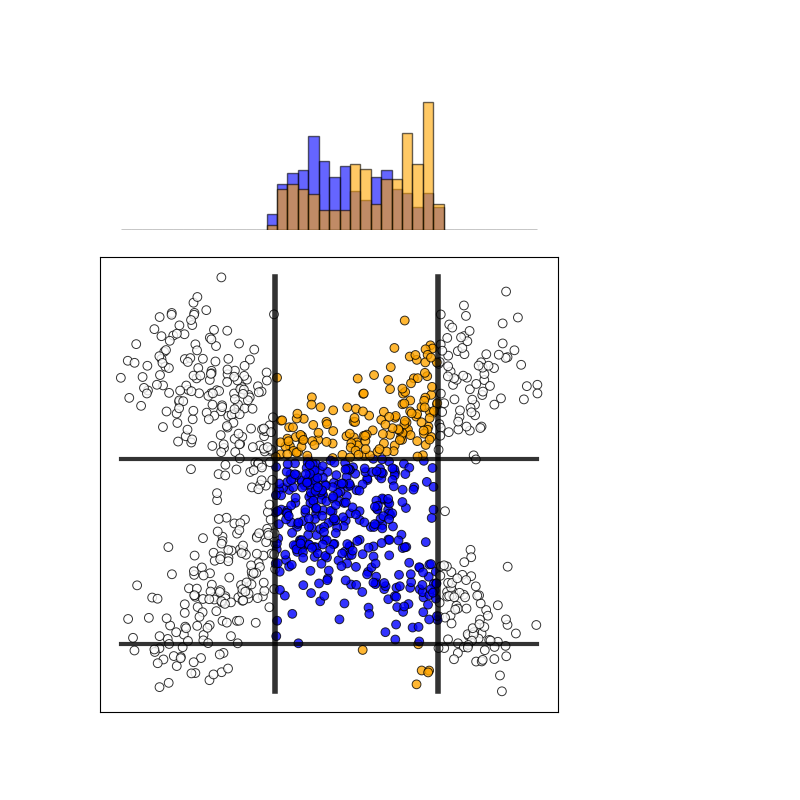

<IPython.core.display.Javascript object>


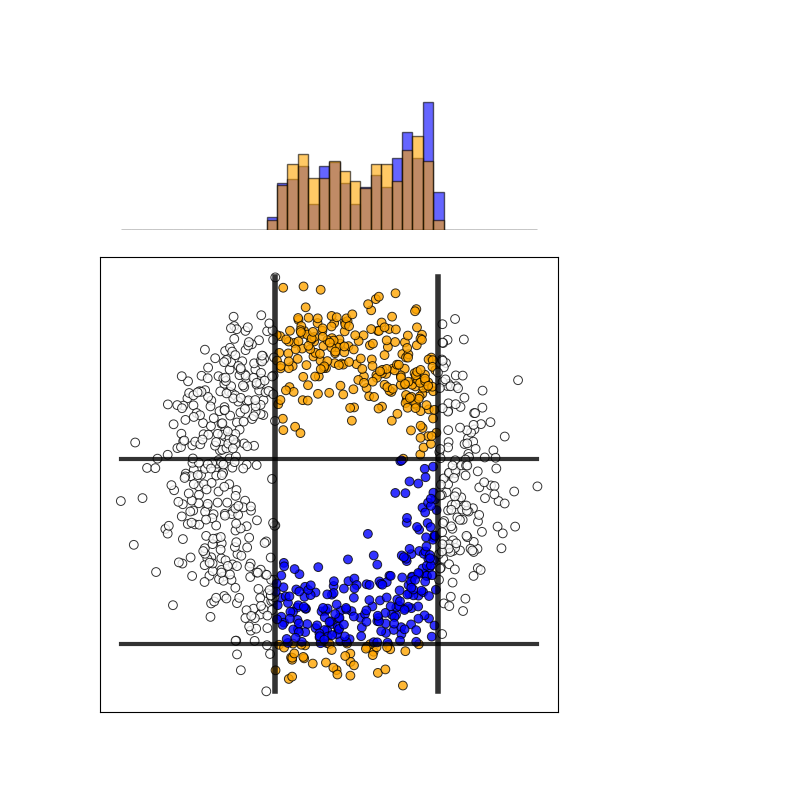

In [205]:
%matplotlib notebook
from matplotlib.gridspec import GridSpec

i = 1
for d in [(independent,"independent"), (linear,"linear"), (cross,"cross"), (circle,"circle")]:
    data = d[0]
    t = d[1]
    fig = plt.figure(figsize=(8,8))

    gs = GridSpec(4,4)

    colors = []
    for x in data['labels']:
        if x == 1:
            colors.append(col1)
        elif  x == 2:
            colors.append(col2)
        else:
            colors.append('w')

    ax_joint = fig.add_subplot(gs[1:4,0:3])
    ax_marg_x = fig.add_subplot(gs[0,0:3])
    ax_marg_y = fig.add_subplot(gs[1:4,3])

    if(choice):
        ref_marg = ax_marg_x
        other_marg = ax_marg_y
    else:
        ref_marg = ax_marg_y
        other_marg = ax_marg_x

    if(choice):
        ax_joint.plot([0,1], [ry,ry], 'k-', c="Black", alpha=0.8, linewidth=3)
        ax_joint.plot([0,1], [rye,rye], 'k-', c="Black", alpha=0.8, linewidth=3)
        ax_joint.plot([rx,rx], [0,1], 'k-', c="Black", alpha=0.8, linewidth=4)
        ax_joint.plot([rxe,rxe], [0,1], 'k-', c="Black", alpha=0.8, linewidth=4)
    else:
        ax_joint.plot([ry,ry], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
        ax_joint.plot([rye,rye], [0,1], 'k-', c="Black", alpha=0.8, linewidth=3)
        ax_joint.plot([0,1], [rx,rx],'k-', c="Black", alpha=0.8, linewidth=4)
        ax_joint.plot([0,1],[rxe,rxe], 'k-', c="Black", alpha=0.8, linewidth=4)


    ax_joint.scatter(data["x"], data["y"], color=colors, edgecolor='black', linewidth=0.7, s=40, alpha=0.8, )

    nbins = 40
    cond1 = data[data['labels'] == 1][ref]
    #h = np.histogram(data['x'], bins=nbins, range=(0,1), weights=np.ones_like(data['x'])/len(data['x']))
    h = np.histogram(cond1, bins=nbins, range=(0,1), weights=np.ones_like(cond1)/len(cond1))

    if(choice):
        ref_marg.bar(h[1][:-1], h[0], alpha=0.6, width=h[1][1] - h[1][0], bottom=1.1, 
                     color=col1, linewidth=1, edgecolor="black")
    else:
        ref_marg.barh(h[1][:-1], h[0], alpha=0.6, height=h[1][1] - h[1][0], 
                color=col1, linewidth=1, edgecolor="black")

    cond2 = data[data['labels'] == 2][ref]
    h = np.histogram(cond2, bins=nbins, range=(0,1), weights=np.ones_like(cond2)/len(cond2))

    if(choice):
        ref_marg.bar(h[1][:-1], h[0], alpha=0.6, width=h[1][1] - h[1][0], bottom=1.1, 
                color=col2, linewidth=1, edgecolor="black")
    else:
        ref_marg.barh(h[1][:-1], h[0], alpha=0.6, height=h[1][1] - h[1][0], 
                color=col2, linewidth=1, edgecolor="black")

    ax_joint.get_xaxis().set_ticks([])
    ax_joint.get_yaxis().set_ticks([])

    other_marg.remove()
    ref_marg.axis('off')

    #ax_joint.set_xlabel("$X_i$", fontsize=40, labelpad=20)
    #ax_joint.set_ylabel("$\overline{X_i}$", fontsize=40, rotation=0, labelpad=30)
    ax_joint.set_xlim((-0.05,1.05))
    ax_joint.set_ylim((-0.05,1.05))

    #plt.tight_layout()

    plt.savefig("/home/fouchee/slicing/ss_%s_2D_0_3_%s.pdf"%(t,i), format="pdf")
    plt.savefig("/home/fouchee/slicing/ss_%s_2D_0_3_%s.png"%(t,i), format="png")